## Credit Card Lead Prediction

Happy Customer Bank is a mid-sized private bank that deals in all kinds of banking products, like Savings accounts, Current accounts, investment products, credit products, among other offerings.

The bank also cross-sells products to its existing customers and to do so they use different kinds of communication like tele-calling, e-mails, recommendations on net banking, mobile banking, etc. 

In this case, the Happy Customer Bank wants to cross sell its credit cards to its existing customers. The bank has identified a set of customers that are eligible for taking these credit cards.

Now, the bank is looking for your help in identifying customers that could show higher intent towards a recommended credit card, given:
- Customer details (gender, age, region etc.)
- Details of his/her relationship with the bank (Channel_Code,Vintage, 'Avg_Asset_Value etc.)

- Channel_Code: A customer acquisition channel is any place your customers meet your brand for the first time — whether through social media, organic search, or a paid ad. Customer acquisition channels are how you bring in new customers.

- Vintage: Vintage is a colloquial term used to describe mortgage-backed securities (MBS) that have been "seasoned." That is, they've been issued long enough, and enough on-time payments have been made, that the risk of default is lower. Vintage is the age of an item as it relates to the year it was created.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import  export_graphviz
import pydotplus, graphviz

from sklearn.metrics import roc_curve, accuracy_score, confusion_matrix
from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 15)

C:\Users\avina\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df_train = pd.read_csv(r"C:\Users\avina\OneDrive\Desktop\Data\Job-a-thon dataset\train_s3TEQDk.csv")
df_train.head(10)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0
5,ACUTYTWS,Male,56,RG261,Self_Employed,X1,32,No,544163,Yes,0
6,ETQCZFEJ,Male,62,RG282,Other,X3,20,NaN,1056750,Yes,1
7,JJNJUQMQ,Female,48,RG265,Self_Employed,X3,13,No,444724,Yes,0
8,ZMQFYKCB,Female,40,RG283,Self_Employed,X2,38,No,1274284,No,0
9,NVKTFBA2,Female,55,RG268,Self_Employed,X2,49,Yes,2014239,No,0


In [3]:
df_test = pd.read_csv(r"C:\Users\avina\OneDrive\Desktop\Data\Job-a-thon dataset\test_mSzZ8RL.csv")
df_test.head(10)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No
5,MZZAQMPT,Male,60,RG268,Self_Employed,X3,110,No,4624262,No
6,Y88TW36I,Female,69,RG253,Other,X2,67,No,1032764,No
7,3UGOAQNU,Female,30,RG257,Salaried,X1,33,No,837009,No
8,VVUKMUJT,Male,43,RG284,Salaried,X3,81,NaN,1001232,Yes
9,9R363ZXS,Female,54,RG283,Self_Employed,X2,37,Yes,1667851,No


In [4]:
df_train.describe()

,Age,Vintage,Avg_Account_Balance,Is_Lead
count,245725.000000,245725.000000,2.457250e+05,245725.000000
mean,43.856307,46.959141,1.128403e+06,0.237208
std,14.828672,32.353136,8.529364e+05,0.425372
min,23.000000,7.000000,2.079000e+04,0.000000
25%,30.000000,20.000000,6.043100e+05,0.000000
50%,43.000000,32.000000,8.946010e+05,0.000000
75%,54.000000,73.000000,1.366666e+06,0.000000
max,85.000000,135.000000,1.035201e+07,1.000000


In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105312 entries, 0 to 105311
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   105312 non-null  object
 1   Gender               105312 non-null  object
 2   Age                  105312 non-null  int64 
 3   Region_Code          105312 non-null  object
 4   Occupation           105312 non-null  object
 5   Channel_Code         105312 non-null  object
 6   Vintage              105312 non-null  int64 
 7   Credit_Product       92790 non-null   object
 8   Avg_Account_Balance  105312 non-null  int64 
 9   Is_Active            105312 non-null  object
dtypes: int64(3), object(7)
memory usage: 8.0+ MB


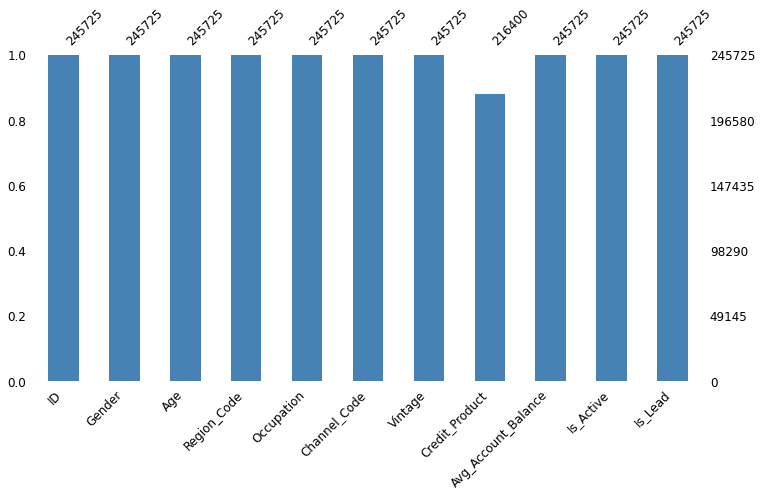

In [6]:
import missingno as msno
msno.bar(df_train, figsize=(12, 6), fontsize=12, color='steelblue')

In [7]:
df_train = df_train.dropna()

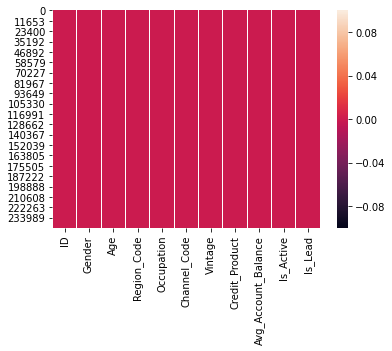

In [8]:
sns.heatmap(df_train.isna())

In [9]:
df_train.shape

(216400, 11)

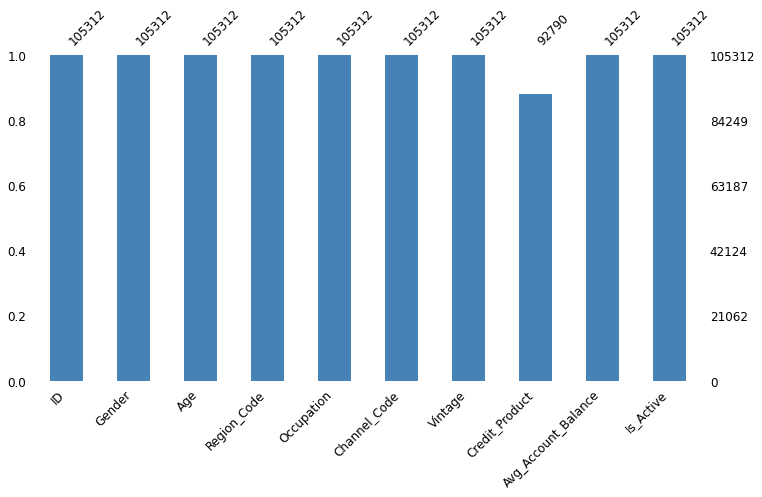

In [10]:
import missingno as msno
msno.bar(df_test, figsize=(12, 6), fontsize=12, color='steelblue')

In [11]:
df_test['Credit_Product'].fillna(df_test['Credit_Product'].mode()[0],inplace=True)
df_test['Credit_Product'].isna().sum()

0

In [12]:
for features in df_train.columns:
    print(f"{features}:{df_train[features].nunique()}")
    

ID:216400
Gender:2
Age:63
Region_Code:35
Occupation:4
Channel_Code:4
Vintage:66
Credit_Product:2
Avg_Account_Balance:125953
Is_Active:2
Is_Lead:2


In [13]:
for features in df_test.columns:
    print(f"{features}:{df_test[features].nunique()}")

ID:105312
Gender:2
Age:62
Region_Code:35
Occupation:4
Channel_Code:4
Vintage:66
Credit_Product:2
Avg_Account_Balance:78315
Is_Active:2


In [14]:
for features in ['Credit_Product','Is_Active']:
    df_train[features] = df_train[features].apply(lambda x: 1 if x =='Yes' else (0 if x =='No' else None))

In [15]:
#df_train['Credit_Product'] = df_train['Credit_Product'].astype(int)

In [16]:
df_train['Gender'] = df_train['Gender'].apply(lambda x: 1 if x =='Male' else (0 if x =='Female' else None))

In [17]:
#df_train['Credit_Product'].ast

In [18]:
df_train.head(10)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,0,73,RG268,Other,X3,43,0,1045696,0,0
1,IDD62UNG,0,30,RG277,Salaried,X1,32,0,581988,0,0
2,HD3DSEMC,0,56,RG268,Self_Employed,X3,26,0,1484315,1,0
3,BF3NC7KV,1,34,RG270,Salaried,X1,19,0,470454,0,0
4,TEASRWXV,0,30,RG282,Salaried,X1,33,0,886787,0,0
5,ACUTYTWS,1,56,RG261,Self_Employed,X1,32,0,544163,1,0
7,JJNJUQMQ,0,48,RG265,Self_Employed,X3,13,0,444724,1,0
8,ZMQFYKCB,0,40,RG283,Self_Employed,X2,38,0,1274284,0,0
9,NVKTFBA2,0,55,RG268,Self_Employed,X2,49,1,2014239,0,0
10,NVC424KZ,1,53,RG254,Self_Employed,X3,123,0,980664,1,0


In [19]:
for features in ['Credit_Product','Is_Active']:
    df_test[features] = df_test[features].apply(lambda x: 1 if x =='Yes' else (0 if x =='No' else None))

In [20]:
df_test['Gender'] = df_test['Gender'].apply(lambda x: 1 if x =='Male' else (0 if x =='Female' else None))

In [21]:
df_test.head(10)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,1,29,RG254,Other,X1,25,1,742366,0
1,CCMEWNKY,1,43,RG268,Other,X2,49,0,925537,0
2,VK3KGA9M,1,31,RG270,Salaried,X1,14,0,215949,0
3,TT8RPZVC,1,29,RG272,Other,X1,33,0,868070,0
4,SHQZEYTZ,0,29,RG270,Other,X1,19,0,657087,0
5,MZZAQMPT,1,60,RG268,Self_Employed,X3,110,0,4624262,0
6,Y88TW36I,0,69,RG253,Other,X2,67,0,1032764,0
7,3UGOAQNU,0,30,RG257,Salaried,X1,33,0,837009,0
8,VVUKMUJT,1,43,RG284,Salaried,X3,81,0,1001232,1
9,9R363ZXS,0,54,RG283,Self_Employed,X2,37,1,1667851,0


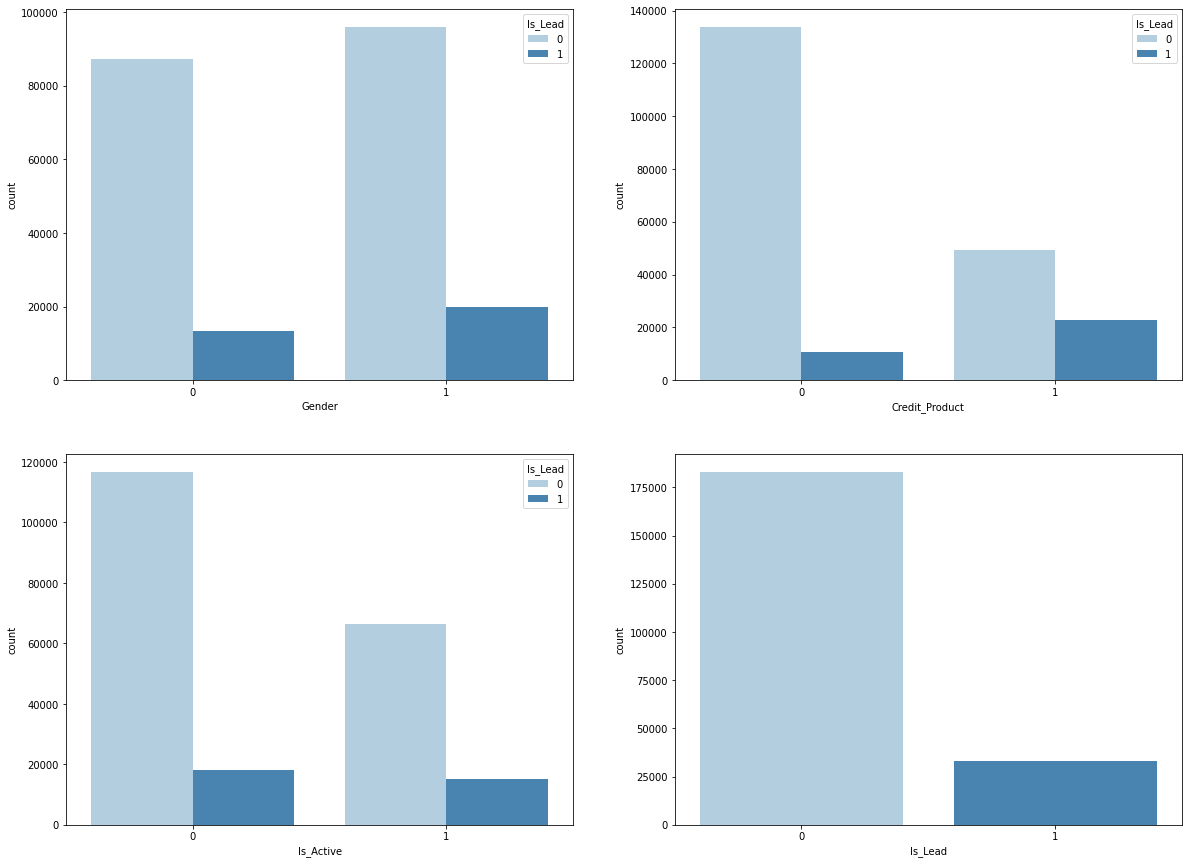

In [22]:
#visualizing the binary features
plt.figure(figsize =(20,15))
plt.subplot(2,2,1)
#sns.countplot(df_train['Gender'])
sns.countplot(x="Gender", hue="Is_Lead", data=df_train, palette="Blues")

plt.subplot(2,2,2)
#sns.countplot(df_train['Credit_Product'])
sns.countplot(x="Credit_Product", hue="Is_Lead", data=df_train, palette="Blues")

plt.subplot(2,2,3)
#sns.countplot(df_train['Is_Active'])
sns.countplot(x="Is_Active", hue="Is_Lead", data=df_train, palette="Blues")

plt.subplot(2,2,4)
sns.countplot(df_train['Is_Lead'],palette="Blues")

In [23]:
df_train['Occupation'].value_counts()

Self_Employed    86120
Salaried         67783
Other            60846
Entrepreneur      1651
Name: Occupation, dtype: int64

In [24]:
df_train['Channel_Code'].value_counts()

X1    100660
X2     55892
X3     54995
X4      4853
Name: Channel_Code, dtype: int64

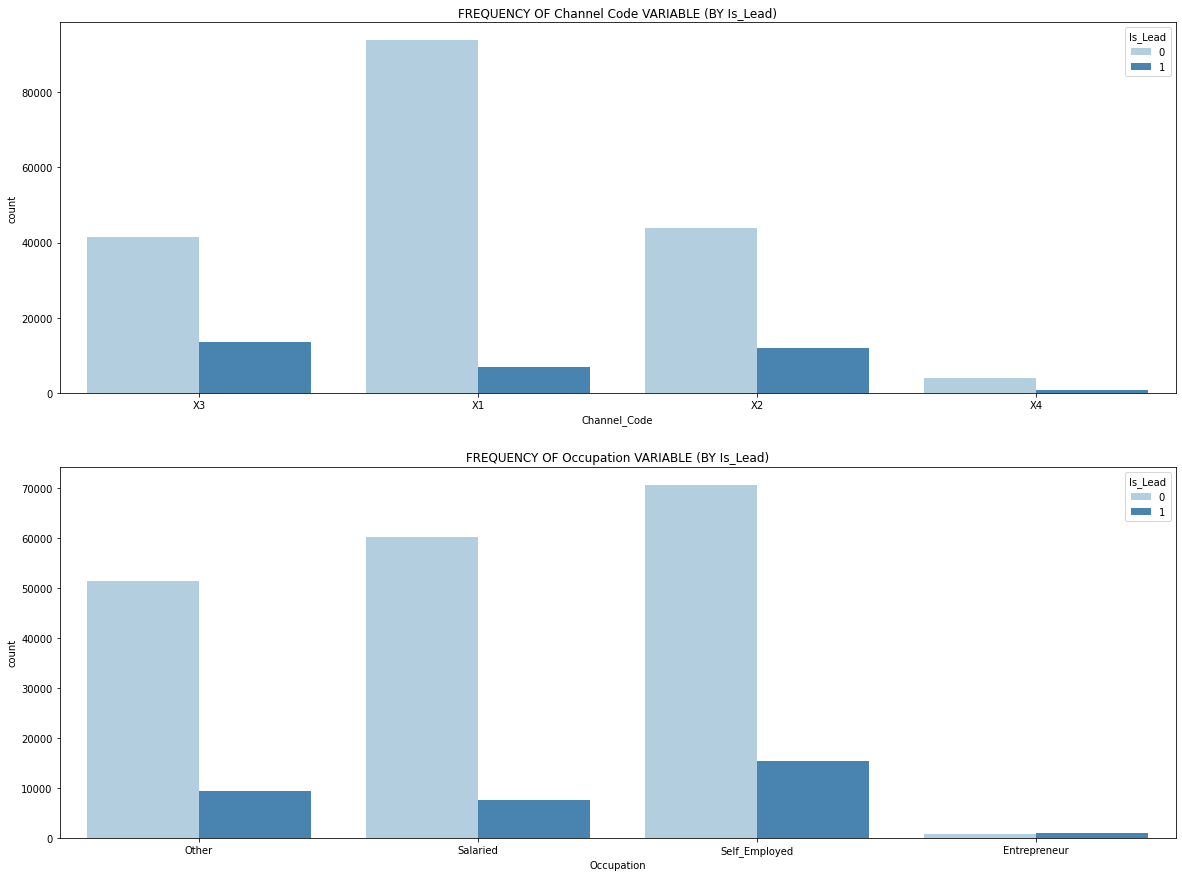

In [25]:
f, axes = plt.subplots(2, 1, figsize=(20, 15), facecolor='white')

#ax1 = sns.countplot(x="Region_Code", hue="Is_Lead", data=df_train, palette="Blues", ax=axes[0,0])
ax1 = sns.countplot(x="Channel_Code", hue="Is_Lead", data=df_train, palette="Blues", ax=axes[0])
ax1.title.set_text('FREQUENCY OF Channel Code VARIABLE (BY Is_Lead)')
ax2 = sns.countplot(x="Occupation", hue="Is_Lead", data=df_train, palette="Blues", ax=axes[1])
ax2.title.set_text('FREQUENCY OF Occupation VARIABLE (BY Is_Lead)')

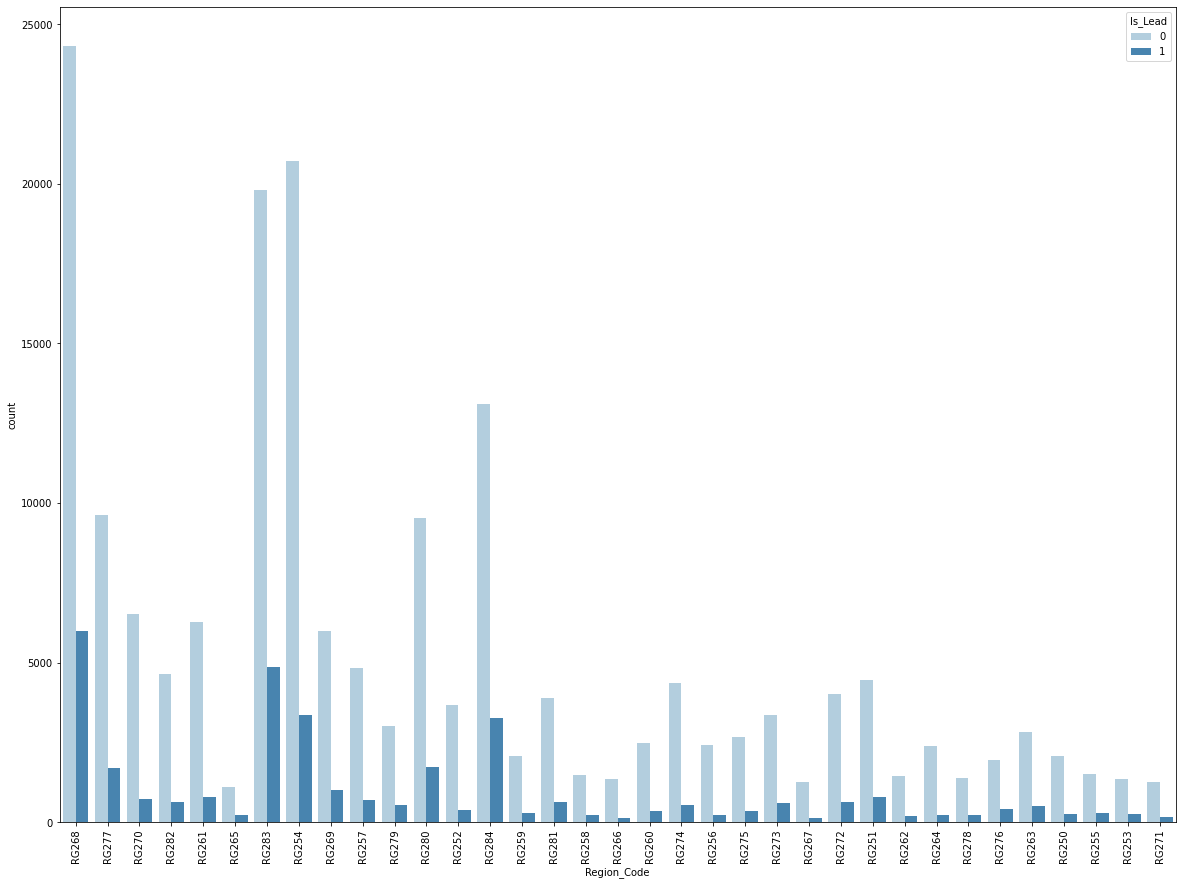

In [26]:
plt.figure(figsize =(20,15))
plt.xticks(rotation=90)
ax1 = sns.countplot(x="Region_Code", hue="Is_Lead", data=df_train, palette="Blues")

In [27]:
yeah = df_train['Is_Lead'].value_counts()
no = yeah[0]
yes = yeah[1]
print(yes,no)

33313 183087


In [28]:
yes_perc = round(yes/len(df_train)*100, 1)
no_perc = round(no/len(df_train)*100, 1)
print(yes_perc,no_perc)

15.4 84.6


In [29]:
# Defining the plot size
plt.figure(figsize=(8, 8))

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

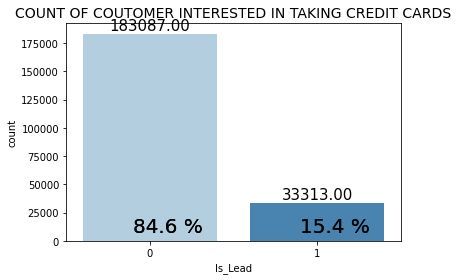

In [30]:
  
# Defining the values for x-axis, y-axis
# and from which datafarme the values are to be picked
plots = sns.countplot('Is_Lead',data=df_train, palette="Blues")
  
# Iterrating over the bars one-by-one
for bar in plots.patches:
    
    plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
    plots.annotate(str(no_perc)+" %", xy=(-0.3, 15000), xytext=(-0.1, 8000), size=20)
    plots.annotate(str(yes_perc)+" %", xy=(0.7, 15000), xytext=(0.9, 8000), size=20)
  

  
# Setting the title for the graph
plt.title('COUNT OF COUTOMER INTERESTED IN TAKING CREDIT CARDS', size=14)
  
# Fianlly showing the plot
plt.show()

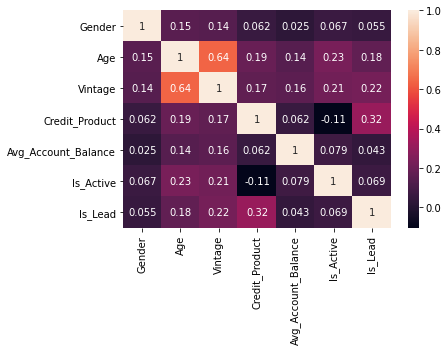

In [31]:
sns.heatmap(df_train.corr(),annot=True)

In [32]:
df_train['Is_Lead'].value_counts()

0    183087
1     33313
Name: Is_Lead, dtype: int64

In [33]:
df_train.groupby('Credit_Product')['Is_Lead'].sum()

Credit_Product
0    10623
1    22690
Name: Is_Lead, dtype: int64

In [34]:
# Univariate Analysis on Credit_Score
yes_perc = np.round((df_train['Credit_Product'].value_counts()[1]/len(df_train))*100,1)
no_perc = np.round((df_train['Credit_Product'].value_counts()[0]/len(df_train))*100,1)
yes_perc_Islead = np.round((df_train.groupby('Credit_Product')['Is_Lead'].sum()[1]/(df_train['Is_Lead'].value_counts()[1]))*100,1)
no_perc_Islead = np.round((df_train.groupby('Credit_Product')['Is_Lead'].sum()[0]/(df_train['Is_Lead'].value_counts()[1]))*100,1)

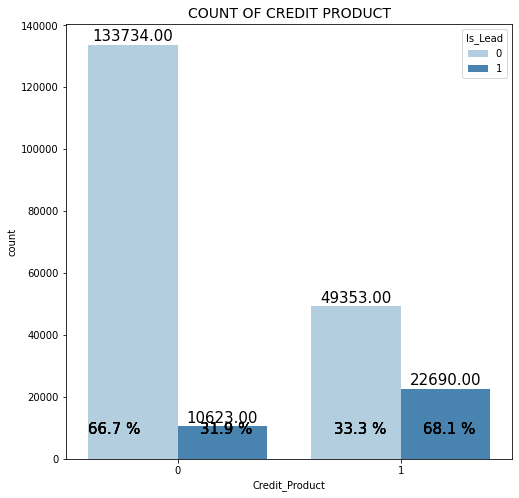

In [35]:
                          
plt.figure(figsize=(8,8))
  
# Defining the values for x-axis, y-axis
# and from which datafarme the values are to be picked
plots = sns.countplot('Credit_Product',hue = 'Is_Lead',data=df_train, palette="Blues")
  
# Iterrating over the bars one-by-one
for bar in plots.patches:
    
    plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
    plots.annotate(str(no_perc)+" %", xy=(-0.3, 15000), xytext=(-0.4, 8000), size=15)
    plots.annotate(str(yes_perc)+" %", xy=(0.7, 15000), xytext=(0.7, 8000), size=15)
    plots.annotate(str(no_perc_Islead)+" %", xy=(-0.3, 15000), xytext=(0.1, 8000), size=15)
    plots.annotate(str(yes_perc_Islead)+" %", xy=(0.7, 15000), xytext=(1.1, 8000), size=15)
  

  
# Setting the title for the graph
plt.title('COUNT OF CREDIT PRODUCT', size=14)
  
# Fianlly showing the plot
plt.show()

In [36]:
df_train['Age'].describe()

count    216400.000000
mean         42.807315
std          14.850996
min          23.000000
25%          29.000000
50%          41.000000
75%          53.000000
max          85.000000
Name: Age, dtype: float64

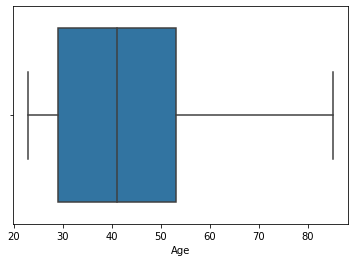

In [37]:
sns.boxplot('Age',hue='Is_Lead',data=df_train)

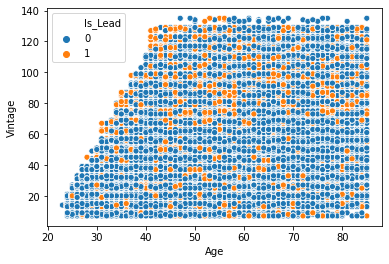

In [38]:
sns.scatterplot(x='Age',y='Vintage',hue='Is_Lead',data=df_train)

In [39]:
Channelcode_enc = pd.get_dummies(df_train['Channel_Code'], prefix='Channel_Code',drop_first=True)
df_train_final = pd.concat([df_train,Channelcode_enc],axis=1)

Channelcode_enc_test = pd.get_dummies(df_test['Channel_Code'], prefix='Channel_Code',drop_first=True)
df_test_final = pd.concat([df_test,Channelcode_enc_test],axis=1)

In [40]:
df_train_final

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4
0,NNVBBKZB,0,73,RG268,Other,X3,43,0,1045696,0,0,0,1,0
1,IDD62UNG,0,30,RG277,Salaried,X1,32,0,581988,0,0,0,0,0
2,HD3DSEMC,0,56,RG268,Self_Employed,X3,26,0,1484315,1,0,0,1,0
3,BF3NC7KV,1,34,RG270,Salaried,X1,19,0,470454,0,0,0,0,0
4,TEASRWXV,0,30,RG282,Salaried,X1,33,0,886787,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245719,DQ48DATH,0,38,RG280,Salaried,X2,13,1,354665,0,0,1,0,0
245721,HFNB7JY8,1,27,RG268,Salaried,X1,15,0,862952,1,0,0,0,0
245722,GEHAUCWT,0,26,RG281,Salaried,X1,13,0,670659,0,0,0,0,0
245723,GE7V8SAH,0,28,RG273,Salaried,X1,31,0,407504,0,0,0,0,0


In [41]:
Occupation_enc = pd.get_dummies(df_train_final['Occupation'],prefix='Occupation',drop_first=True)
df_train_final = pd.concat([df_train_final,Occupation_enc],axis=1)

Occupation_enc_test = pd.get_dummies(df_test_final['Occupation'],prefix='Occupation',drop_first=True)
df_test_final = pd.concat([df_test_final,Occupation_enc_test],axis=1)

In [42]:
Regioncode_enc = pd.get_dummies(df_train_final['Region_Code'],prefix='Regioncode',drop_first=True)
df_train_final = pd.concat([df_train_final,Regioncode_enc],axis=1)

Regioncode_enc_test = pd.get_dummies(df_test_final['Region_Code'],prefix='Regioncode',drop_first=True)
df_test_final = pd.concat([df_test_final,Regioncode_enc_test],axis=1)

In [43]:
df_train_final = df_train_final.drop(['ID','Channel_Code','Occupation','Region_Code'],axis=1)

df_test_final = df_test_final.drop(['ID','Channel_Code','Occupation','Region_Code'],axis=1)

In [44]:
df_train_final.head()

,Gender,Age,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,...,Regioncode_RG278,Regioncode_RG279,Regioncode_RG280,Regioncode_RG281,Regioncode_RG282,Regioncode_RG283,Regioncode_RG284
0,0,73,43,0,1045696,0,0,...,0,0,0,0,0,0,0
1,0,30,32,0,581988,0,0,...,0,0,0,0,0,0,0
2,0,56,26,0,1484315,1,0,...,0,0,0,0,0,0,0
3,1,34,19,0,470454,0,0,...,0,0,0,0,0,0,0
4,0,30,33,0,886787,0,0,...,0,0,0,0,1,0,0


In [45]:
df_test_final.head()

,Gender,Age,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Channel_Code_X2,...,Regioncode_RG278,Regioncode_RG279,Regioncode_RG280,Regioncode_RG281,Regioncode_RG282,Regioncode_RG283,Regioncode_RG284
0,1,29,25,1,742366,0,0,...,0,0,0,0,0,0,0
1,1,43,49,0,925537,0,1,...,0,0,0,0,0,0,0
2,1,31,14,0,215949,0,0,...,0,0,0,0,0,0,0
3,1,29,33,0,868070,0,0,...,0,0,0,0,0,0,0
4,0,29,19,0,657087,0,0,...,0,0,0,0,0,0,0


In [46]:
df_test_final.columns

Index(['Gender', 'Age', 'Vintage', 'Credit_Product', 'Avg_Account_Balance',
       'Is_Active', 'Channel_Code_X2', 'Channel_Code_X3', 'Channel_Code_X4',
       'Occupation_Other', 'Occupation_Salaried', 'Occupation_Self_Employed',
       'Regioncode_RG251', 'Regioncode_RG252', 'Regioncode_RG253',
       'Regioncode_RG254', 'Regioncode_RG255', 'Regioncode_RG256',
       'Regioncode_RG257', 'Regioncode_RG258', 'Regioncode_RG259',
       'Regioncode_RG260', 'Regioncode_RG261', 'Regioncode_RG262',
       'Regioncode_RG263', 'Regioncode_RG264', 'Regioncode_RG265',
       'Regioncode_RG266', 'Regioncode_RG267', 'Regioncode_RG268',
       'Regioncode_RG269', 'Regioncode_RG270', 'Regioncode_RG271',
       'Regioncode_RG272', 'Regioncode_RG273', 'Regioncode_RG274',
       'Regioncode_RG275', 'Regioncode_RG276', 'Regioncode_RG277',
       'Regioncode_RG278', 'Regioncode_RG279', 'Regioncode_RG280',
       'Regioncode_RG281', 'Regioncode_RG282', 'Regioncode_RG283',
       'Regioncode_RG284'],
    

In [47]:
df_train_final.columns

Index(['Gender', 'Age', 'Vintage', 'Credit_Product', 'Avg_Account_Balance',
       'Is_Active', 'Is_Lead', 'Channel_Code_X2', 'Channel_Code_X3',
       'Channel_Code_X4', 'Occupation_Other', 'Occupation_Salaried',
       'Occupation_Self_Employed', 'Regioncode_RG251', 'Regioncode_RG252',
       'Regioncode_RG253', 'Regioncode_RG254', 'Regioncode_RG255',
       'Regioncode_RG256', 'Regioncode_RG257', 'Regioncode_RG258',
       'Regioncode_RG259', 'Regioncode_RG260', 'Regioncode_RG261',
       'Regioncode_RG262', 'Regioncode_RG263', 'Regioncode_RG264',
       'Regioncode_RG265', 'Regioncode_RG266', 'Regioncode_RG267',
       'Regioncode_RG268', 'Regioncode_RG269', 'Regioncode_RG270',
       'Regioncode_RG271', 'Regioncode_RG272', 'Regioncode_RG273',
       'Regioncode_RG274', 'Regioncode_RG275', 'Regioncode_RG276',
       'Regioncode_RG277', 'Regioncode_RG278', 'Regioncode_RG279',
       'Regioncode_RG280', 'Regioncode_RG281', 'Regioncode_RG282',
       'Regioncode_RG283', 'Regioncode_RG

In [48]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_train_df = scaler.fit_transform(df_train_final)
scaled_train_df = pd.DataFrame(scaled_train_df, columns=df_train_final.columns)

scaled_train_df

,Gender,Age,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,...,Regioncode_RG278,Regioncode_RG279,Regioncode_RG280,Regioncode_RG281,Regioncode_RG282,Regioncode_RG283,Regioncode_RG284
0,0.0,0.806452,0.281250,0.0,0.099205,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.112903,0.195312,0.0,0.054321,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.532258,0.148438,0.0,0.141660,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.177419,0.093750,0.0,0.043525,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.112903,0.203125,0.0,0.083823,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216395,0.0,0.241935,0.046875,1.0,0.032317,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0
216396,1.0,0.064516,0.062500,0.0,0.081516,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0
216397,0.0,0.048387,0.046875,0.0,0.062903,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0
216398,0.0,0.080645,0.187500,0.0,0.037432,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
scaled_test_df = scaler.fit_transform(df_test_final)
scaled_test_df = pd.DataFrame(scaled_test_df, columns=df_test_final.columns)

scaled_test_df

,Gender,Age,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Channel_Code_X2,...,Regioncode_RG278,Regioncode_RG279,Regioncode_RG280,Regioncode_RG281,Regioncode_RG282,Regioncode_RG283,Regioncode_RG284
0,1.0,0.081967,0.140625,1.0,0.072805,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.311475,0.328125,0.0,0.091333,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.114754,0.054688,0.0,0.019558,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.081967,0.203125,0.0,0.085520,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.081967,0.093750,0.0,0.064179,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105307,1.0,0.459016,0.617188,1.0,0.426851,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0
105308,1.0,0.508197,0.617188,1.0,0.114963,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0
105309,1.0,0.180328,0.062500,0.0,0.170047,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0
105310,1.0,0.475410,0.671875,0.0,0.072280,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
print(scaled_train_df.shape)
print(scaled_test_df.shape)

(216400, 47)
(105312, 46)


In [51]:
X = scaled_train_df.copy()

In [52]:
y_train = X.pop('Is_Lead')
X_train= X

# Model Building

## Logistic Regression

In [53]:
#model building

import statsmodels.api as sm

# Logistic regression model
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train,(sm.add_constant(X_train_sm)), family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                Is_Lead   No. Observations:               216400
Model:                            GLM   Df Residuals:                   216353
Model Family:                Binomial   Df Model:                           46
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -77426.
Date:                Sun, 30 May 2021   Deviance:                   1.5485e+05
Time:                        17:39:40   Pearson chi2:                 2.28e+05
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -3.4546      0.091    -37.759      0.000      -3.634      -3.275
Gender                       0.0331      0.013      2.469      0.014       0.007       0.059
Age                          0.5412      0.046     11.760      0.000       0.451       0.631
Vintage                      1.3326      0.034     39.153      0.000       1.266       1.399
Credit_Product               1.6118      0.014    114.910      0.000       1.584       1.639
Avg_Account_Balance         -0.2625      0.083     -3.145      0.002      -0.426      -0.099
Is_Active                    0.3721      0.014     26.466      0.000       0.345       0.400
Channel_Code_X2              1.0013      0.024     41.481      0.000       0.954       1.049
Channel_Code_X3              0.8459      0.026     32.954      0.000       0.796       0.896
Channel_Code_X4              0.8503      0.046     18.563      0.000       0.761       0.940
Occupation_Other            -0.9328      0.054    -17.408      0.000      -1.038      -0.828
Occupation_Salaried          0.1069      0.055      1.934      0.053      -0.001       0.215
Occupation_Self_Employed    -0.8356      0.052    -16.016      0.000      -0.938      -0.733
Regioncode_RG251             0.2203      0.083      2.651      0.008       0.057       0.383
Regioncode_RG252             0.2212      0.092      2.417      0.016       0.042       0.401
Regioncode_RG253             0.0510      0.103      0.494      0.621      -0.151       0.253
Regioncode_RG254             0.1002      0.075      1.341      0.180      -0.046       0.247
Regioncode_RG255             0.2672      0.100      2.663      0.008       0.071       0.464
Regioncode_RG256             0.0529      0.102      0.516      0.606      -0.148       0.254
Regioncode_RG257             0.2812      0.084      3.335      0.001       0.116       0.446
Regioncode_RG258             0.1889      0.104      1.814      0.070      -0.015       0.393
Regioncode_RG259             0.0627      0.098      0.639      0.523      -0.130       0.255
Regioncode_RG260             0.1823      0.095      1.912      0.056      -0.005       0.369
Regioncode_RG261             0.1275      0.082      1.551      0.121      -0.034       0.289
Regioncode_RG262             0.0534      0.109      0.491      0.623      -0.160       0.266
Regioncode_RG263             0.3554      0.089      3.988      0.000       0.181       0.530
Regioncode_RG264             0.0847      0.102      0.830      0.406      -0.115       0.285
Regioncode_RG265             0.1354      0.107      1.261      0.207      -0.075       0.346
Regioncode_RG266             0.0139      0.118      0.118      0.906      -0.217       0.245
Regioncode_RG267            -0.1620      0.120     -1.354      0.176      -0.396       0.073
Regioncode_RG2

In [54]:
z = [res.pvalues[res.pvalues>0.05]]
z

[Occupation_Salaried    0.053112
 Regioncode_RG253       0.620970
 Regioncode_RG254       0.179979
 Regioncode_RG256       0.605535
 Regioncode_RG258       0.069609
 Regioncode_RG259       0.523015
 Regioncode_RG260       0.055838
 Regioncode_RG261       0.120996
 Regioncode_RG262       0.623224
 Regioncode_RG264       0.406499
 Regioncode_RG265       0.207390
 Regioncode_RG266       0.906010
 Regioncode_RG267       0.175865
 Regioncode_RG271       0.320923
 Regioncode_RG274       0.505336
 Regioncode_RG275       0.749205
 Regioncode_RG278       0.892995
 Regioncode_RG281       0.138120
 Regioncode_RG282       0.088164
 dtype: float64]

In [55]:
X_train_sm = X_train_sm.drop(['Occupation_Salaried',
 'Regioncode_RG253',       
 'Regioncode_RG254',       
 'Regioncode_RG256',
 'Regioncode_RG258',       
 'Regioncode_RG259',       
 'Regioncode_RG260',       
 'Regioncode_RG261',       
 'Regioncode_RG262',       
 'Regioncode_RG264',       
 'Regioncode_RG265',       
 'Regioncode_RG266',       
 'Regioncode_RG267',       
 'Regioncode_RG271',       
 'Regioncode_RG274',       
 'Regioncode_RG275',       
 'Regioncode_RG278',       
 'Regioncode_RG281','Regioncode_RG282'],axis=1)

In [56]:
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                Is_Lead   No. Observations:               216400
Model:                            GLM   Df Residuals:                   216372
Model Family:                Binomial   Df Model:                           27
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -77437.
Date:                Sun, 30 May 2021   Deviance:                   1.5487e+05
Time:                        17:39:42   Pearson chi2:                 2.27e+05
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -3.2598      0.021   -155.695      0.000      -3.301      -3.219
Gender                       0.0332      0.013      2.474      0.013       0.007       0.059
Age                          0.5382      0.046     11.730      0.000       0.448       0.628
Vintage                      1.3294      0.034     39.107      0.000       1.263       1.396
Credit_Product               1.6081      0.014    115.298      0.000       1.581       1.635
Avg_Account_Balance         -0.2546      0.082     -3.102      0.002      -0.415      -0.094
Is_Active                    0.3720      0.014     26.483      0.000       0.344       0.400
Channel_Code_X2              0.9950      0.024     42.079      0.000       0.949       1.041
Channel_Code_X3              0.8402      0.025     33.218      0.000       0.791       0.890
Channel_Code_X4              0.8441      0.046     18.539      0.000       0.755       0.933
Occupation_Other            -1.0243      0.025    -40.885      0.000      -1.073      -0.975
Occupation_Self_Employed    -0.9271      0.021    -43.371      0.000      -0.969      -0.885
Regioncode_RG251             0.1282      0.044      2.937      0.003       0.043       0.214
Regioncode_RG252             0.1304      0.058      2.235      0.025       0.016       0.245
Regioncode_RG255             0.1745      0.071      2.450      0.014       0.035       0.314
Regioncode_RG257             0.1894      0.046      4.118      0.000       0.099       0.280
Regioncode_RG263             0.2631      0.054      4.849      0.000       0.157       0.369
Regioncode_RG268             0.1067      0.020      5.236      0.000       0.067       0.147
Regioncode_RG269             0.2389      0.039      6.075      0.000       0.162       0.316
Regioncode_RG270             0.1285      0.044      2.920      0.004       0.042       0.215
Regioncode_RG272             0.0902      0.048      1.891      0.059      -0.003       0.184
Regioncode_RG273             0.1749      0.050      3.475      0.001       0.076       0.274
Regioncode_RG276             0.1075      0.060      1.790      0.074      -0.010       0.225
Regioncode_RG277             0.2293      0.031      7.326      0.000       0.168       0.291
Regioncode_RG279             0.2186      0.052      4.170      0.000       0.116       0.321
Regioncode_RG280             0.1695      0.031      5.482      0.000       0.109       0.230
Regioncode_RG283             0.0970      0.022      4.461      0.000       0.054       0.140
Regioncode_RG284             0.1193      0.025      4.767      0.000       0.070       0.168
============================================================================================
"""

In [57]:
X_train_sm = X_train_sm.drop(['Regioncode_RG276','Regioncode_RG272'],axis=1)

In [58]:
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                Is_Lead   No. Observations:               216400
Model:                            GLM   Df Residuals:                   216374
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -77441.
Date:                Sun, 30 May 2021   Deviance:                   1.5488e+05
Time:                        17:39:43   Pearson chi2:                 2.27e+05
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -3.2514      0.021   -157.487      0.000      -3.292      -3.211
Gender                       0.0329      0.013      2.452      0.014       0.007       0.059
Age                          0.5404      0.046     11.780      0.000       0.450       0.630
Vintage                      1.3284      0.034     39.084      0.000       1.262       1.395
Credit_Product               1.6081      0.014    115.307      0.000       1.581       1.635
Avg_Account_Balance         -0.2588      0.082     -3.155      0.002      -0.420      -0.098
Is_Active                    0.3717      0.014     26.461      0.000       0.344       0.399
Channel_Code_X2              0.9970      0.024     42.184      0.000       0.951       1.043
Channel_Code_X3              0.8418      0.025     33.295      0.000       0.792       0.891
Channel_Code_X4              0.8463      0.046     18.591      0.000       0.757       0.936
Occupation_Other            -1.0242      0.025    -40.884      0.000      -1.073      -0.975
Occupation_Self_Employed    -0.9271      0.021    -43.371      0.000      -0.969      -0.885
Regioncode_RG251             0.1185      0.043      2.725      0.006       0.033       0.204
Regioncode_RG252             0.1214      0.058      2.084      0.037       0.007       0.235
Regioncode_RG255             0.1651      0.071      2.321      0.020       0.026       0.305
Regioncode_RG257             0.1801      0.046      3.928      0.000       0.090       0.270
Regioncode_RG263             0.2536      0.054      4.685      0.000       0.148       0.360
Regioncode_RG268             0.0972      0.020      4.856      0.000       0.058       0.136
Regioncode_RG269             0.2295      0.039      5.861      0.000       0.153       0.306
Regioncode_RG270             0.1194      0.044      2.722      0.006       0.033       0.205
Regioncode_RG273             0.1653      0.050      3.295      0.001       0.067       0.264
Regioncode_RG277             0.2199      0.031      7.078      0.000       0.159       0.281
Regioncode_RG279             0.2091      0.052      4.001      0.000       0.107       0.312
Regioncode_RG280             0.1599      0.031      5.212      0.000       0.100       0.220
Regioncode_RG283             0.0875      0.021      4.088      0.000       0.046       0.130
Regioncode_RG284             0.1098      0.025      4.440      0.000       0.061       0.158
============================================================================================
"""

In [59]:
y_train_pred = res.predict(X_train_sm)

In [60]:
y_train_pred

0         0.072238
1         0.061509
2         0.081692
3         0.052655
4         0.050106
            ...   
216395    0.425111
216396    0.065819
216397    0.039955
216398    0.057160
216399    0.056297
Length: 216400, dtype: float64

In [61]:
y_train_pred_final = pd.DataFrame()

In [62]:
y_train.isna().sum()

0

In [63]:
# y_train_df = y_train.values.reshape(-1)

In [64]:
y_train_pred_final['Islead_Prob'] = y_train_pred
y_train_pred_final['Is_Lead'] = y_train

In [65]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Islead_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Islead_Prob,Is_Lead,predicted
0,0.072238,0.0,0
1,0.061509,0.0,0
2,0.081692,0.0,0
3,0.052655,0.0,0
4,0.050106,0.0,0


In [66]:
y_train_pred_final.isna().sum()

Islead_Prob    0
Is_Lead        0
predicted      0
dtype: int64

In [67]:
print('Train set Performance')
print(f'Accuracy is {accuracy_score(y_train_pred_final.Is_Lead, y_train_pred_final.predicted)}')
print(f'Confusion Matrix : \n {confusion_matrix(y_train_pred_final.Is_Lead, y_train_pred_final.predicted)}')
print(f'ROC_AUC_Score: {roc_auc_score(y_train_pred_final.Is_Lead, y_train_pred_final.predicted)}')

Train set Performance
Accuracy is 0.8533687615526803
Confusion Matrix : 
 [[180283   2804]
 [ 28927   4386]]
ROC_AUC_Score: 0.558172594689764


In [68]:
# y_train_pred_logr = res.predict(X_train)
# y_test_pred_logr = res.predict(scaled_test_df)
# print('Train set Performance')
# print(f'Accuracy is {accuracy_score(y_train, y_train_pred_logr)}')
# print(f'Confusion Matrix : \n {confusion_matrix(y_train,y_train_pred_logr)}')
# print(f'ROC_AUC_Score: {roc_auc_score(y_train, y_train_pred_logr)}')

### Feature Selection Using RFE

In [69]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [70]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train, y_train)

In [71]:
rfe.support_

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False,  True, False,
        True, False, False, False, False, False,  True, False, False,
       False,  True, False,  True, False, False, False,  True, False,
       False, False,  True, False,  True,  True, False, False, False,
       False])

In [72]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Gender', False, 19),
 ('Age', True, 1),
 ('Vintage', True, 1),
 ('Credit_Product', True, 1),
 ('Avg_Account_Balance', True, 1),
 ('Is_Active', True, 1),
 ('Channel_Code_X2', True, 1),
 ('Channel_Code_X3', True, 1),
 ('Channel_Code_X4', True, 1),
 ('Occupation_Other', True, 1),
 ('Occupation_Salaried', True, 1),
 ('Occupation_Self_Employed', True, 1),
 ('Regioncode_RG251', False, 4),
 ('Regioncode_RG252', False, 2),
 ('Regioncode_RG253', False, 24),
 ('Regioncode_RG254', False, 17),
 ('Regioncode_RG255', True, 1),
 ('Regioncode_RG256', False, 22),
 ('Regioncode_RG257', True, 1),
 ('Regioncode_RG258', False, 9),
 ('Regioncode_RG259', False, 20),
 ('Regioncode_RG260', False, 10),
 ('Regioncode_RG261', False, 14),
 ('Regioncode_RG262', False, 23),
 ('Regioncode_RG263', True, 1),
 ('Regioncode_RG264', False, 18),
 ('Regioncode_RG265', False, 13),
 ('Regioncode_RG266', False, 25),
 ('Regioncode_RG267', True, 1),
 ('Regioncode_RG268', False, 7),
 ('Regioncode_RG269', True, 1),
 ('Regioncod

In [73]:
col = X_train.columns[rfe.support_]

In [74]:
X_train.columns[~rfe.support_]

Index(['Gender', 'Regioncode_RG251', 'Regioncode_RG252', 'Regioncode_RG253',
       'Regioncode_RG254', 'Regioncode_RG256', 'Regioncode_RG258',
       'Regioncode_RG259', 'Regioncode_RG260', 'Regioncode_RG261',
       'Regioncode_RG262', 'Regioncode_RG264', 'Regioncode_RG265',
       'Regioncode_RG266', 'Regioncode_RG268', 'Regioncode_RG270',
       'Regioncode_RG271', 'Regioncode_RG272', 'Regioncode_RG274',
       'Regioncode_RG275', 'Regioncode_RG276', 'Regioncode_RG278',
       'Regioncode_RG281', 'Regioncode_RG282', 'Regioncode_RG283',
       'Regioncode_RG284'],
      dtype='object')

##### Assessing the model with StatsModels

In [75]:
X_train_rfe = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_rfe, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                Is_Lead   No. Observations:               216400
Model:                            GLM   Df Residuals:                   216379
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -77458.
Date:                Sun, 30 May 2021   Deviance:                   1.5492e+05
Time:                        17:40:26   Pearson chi2:                 2.27e+05
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -3.2854      0.057    -57.182      0.000      -3.398      -3.173
Age                          0.5552      0.046     12.080      0.000       0.465       0.645
Vintage                      1.3445      0.034     39.731      0.000       1.278       1.411
Credit_Product               1.6133      0.014    115.421      0.000       1.586       1.641
Avg_Account_Balance         -0.2105      0.080     -2.638      0.008      -0.367      -0.054
Is_Active                    0.3750      0.014     26.733      0.000       0.347       0.402
Channel_Code_X2              1.0079      0.024     41.974      0.000       0.961       1.055
Channel_Code_X3              0.8546      0.026     33.394      0.000       0.804       0.905
Channel_Code_X4              0.8603      0.046     18.824      0.000       0.771       0.950
Occupation_Other            -0.9456      0.054    -17.658      0.000      -1.051      -0.841
Occupation_Salaried          0.0895      0.055      1.621      0.105      -0.019       0.198
Occupation_Self_Employed    -0.8452      0.052    -16.203      0.000      -0.947      -0.743
Regioncode_RG255             0.1085      0.071      1.535      0.125      -0.030       0.247
Regioncode_RG257             0.1242      0.045      2.751      0.006       0.036       0.213
Regioncode_RG263             0.1979      0.054      3.697      0.000       0.093       0.303
Regioncode_RG267            -0.3157      0.096     -3.277      0.001      -0.505      -0.127
Regioncode_RG269             0.1720      0.038      4.498      0.000       0.097       0.247
Regioncode_RG273             0.1085      0.050      2.192      0.028       0.011       0.206
Regioncode_RG277             0.1622      0.030      5.421      0.000       0.104       0.221
Regioncode_RG279             0.1531      0.052      2.963      0.003       0.052       0.254
Regioncode_RG280             0.1035      0.030      3.505      0.000       0.046       0.161
============================================================================================
"""

In [76]:
X_train_rfe_ = X_train_rfe.drop(['Regioncode_RG255','Occupation_Salaried'],axis=1)

In [77]:
X_train_rfe = sm.add_constant(X_train_rfe_)
logm5 = sm.GLM(y_train,X_train_rfe, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                Is_Lead   No. Observations:               216400
Model:                            GLM   Df Residuals:                   216381
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -77461.
Date:                Sun, 30 May 2021   Deviance:                   1.5492e+05
Time:                        17:40:27   Pearson chi2:                 2.27e+05
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -3.1954      0.019   -170.113      0.000      -3.232      -3.159
Age                          0.5511      0.046     12.022      0.000       0.461       0.641
Vintage                      1.3418      0.034     39.683      0.000       1.275       1.408
Credit_Product               1.6114      0.014    115.753      0.000       1.584       1.639
Avg_Account_Balance         -0.2171      0.080     -2.722      0.006      -0.373      -0.061
Is_Active                    0.3747      0.014     26.713      0.000       0.347       0.402
Channel_Code_X2              1.0006      0.024     42.449      0.000       0.954       1.047
Channel_Code_X3              0.8479      0.025     33.578      0.000       0.798       0.897
Channel_Code_X4              0.8529      0.045     18.757      0.000       0.764       0.942
Occupation_Other            -1.0226      0.025    -40.847      0.000      -1.072      -0.974
Occupation_Self_Employed    -0.9227      0.021    -43.235      0.000      -0.965      -0.881
Regioncode_RG257             0.1234      0.045      2.735      0.006       0.035       0.212
Regioncode_RG263             0.1969      0.054      3.680      0.000       0.092       0.302
Regioncode_RG267            -0.3158      0.096     -3.278      0.001      -0.505      -0.127
Regioncode_RG269             0.1713      0.038      4.483      0.000       0.096       0.246
Regioncode_RG273             0.1079      0.050      2.180      0.029       0.011       0.205
Regioncode_RG277             0.1616      0.030      5.405      0.000       0.103       0.220
Regioncode_RG279             0.1521      0.052      2.945      0.003       0.051       0.253
Regioncode_RG280             0.1025      0.030      3.472      0.001       0.045       0.160
============================================================================================
"""

In [78]:
# Getting the predicted values on the train set
y_train_pred_rfe = res.predict(X_train_rfe)
y_train_pred_rfe[:10]

0    0.071108
1    0.061730
2    0.080636
3    0.048280
4    0.053212
5    0.039202
6    0.067909
7    0.064903
8    0.305063
9    0.192629
dtype: float64

In [79]:
y_train_pred_final['Islead_rfe_Prob'] = y_train_pred_rfe
# Creating new column 'rfe_predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['rfe_predicted'] = y_train_pred_final.Islead_rfe_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Islead_Prob,Is_Lead,predicted,Islead_rfe_Prob,rfe_predicted
0,0.072238,0.0,0,0.071108,0
1,0.061509,0.0,0,0.061730,0
2,0.081692,0.0,0,0.080636,0
3,0.052655,0.0,0,0.048280,0
4,0.050106,0.0,0,0.053212,0


In [80]:
print('Train set Performance')
print(f'Accuracy is {accuracy_score(y_train_pred_final.Is_Lead, y_train_pred_final.rfe_predicted)}')
print(f'Confusion Matrix : \n {confusion_matrix(y_train_pred_final.Is_Lead,  y_train_pred_final.rfe_predicted)}')
print(f'ROC_AUC_Score: {roc_auc_score(y_train_pred_final.Is_Lead,  y_train_pred_final.rfe_predicted)}')

Train set Performance
Accuracy is 0.8530961182994454
Confusion Matrix : 
 [[180251   2836]
 [ 28954   4359]]
ROC_AUC_Score: 0.5576799573411182


In [81]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,6.08
7,Channel_Code_X3,2.80
1,Age,2.73
6,Channel_Code_X2,2.35
10,Occupation_Self_Employed,2.16
2,Vintage,2.15
9,Occupation_Other,2.01
5,Is_Active,1.17
8,Channel_Code_X4,1.15
3,Credit_Product,1.13


In [90]:
#Finding optimal cut-off point
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Islead_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Islead_Prob,Is_Lead,predicted,Islead_rfe_Prob,rfe_predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0.072238,0.0,0,0.071108,0,1,0,0,0,0,0,0,0,0,0
1,0.061509,0.0,0,0.061730,0,1,0,0,0,0,0,0,0,0,0
2,0.081692,0.0,0,0.080636,0,1,0,0,0,0,0,0,0,0,0
3,0.052655,0.0,0,0.048280,0,1,0,0,0,0,0,0,0,0,0
4,0.050106,0.0,0,0.053212,0,1,0,0,0,0,0,0,0,0,0


In [92]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
#from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_train_pred_final.Is_Lead, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.153942  1.000000  0.000000
0.1   0.1  0.624713  0.812506  0.590544
0.2   0.2  0.772981  0.635187  0.798052
0.3   0.3  0.824815  0.472728  0.888878
0.4   0.4  0.846086  0.304536  0.944622
0.5   0.5  0.853369  0.131660  0.984685
0.6   0.6  0.852634  0.050431  0.998596
0.7   0.7  0.848239  0.015940  0.999678
0.8   0.8  0.846063  0.000030  1.000000
0.9   0.9  0.846058  0.000000  1.000000


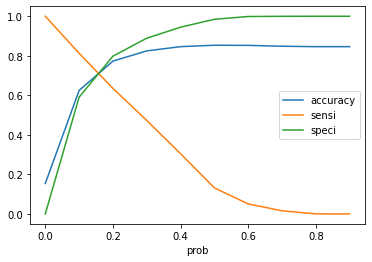

In [94]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [95]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Islead_Prob.map( lambda x: 1 if x > 0.2 else 0)

y_train_pred_final.head()

,Islead_Prob,Is_Lead,predicted,Islead_rfe_Prob,rfe_predicted,0.0,0.1,...,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0.072238,0.0,0,0.071108,0,1,0,...,0,0,0,0,0,0,0
1,0.061509,0.0,0,0.061730,0,1,0,...,0,0,0,0,0,0,0
2,0.081692,0.0,0,0.080636,0,1,0,...,0,0,0,0,0,0,0
3,0.052655,0.0,0,0.048280,0,1,0,...,0,0,0,0,0,0,0
4,0.050106,0.0,0,0.053212,0,1,0,...,0,0,0,0,0,0,0


In [96]:
print('Train set Performance')
print(f'Accuracy is {accuracy_score(y_train_pred_final.Is_Lead, y_train_pred_final.final_predicted)}')
print(f'Confusion Matrix : \n {confusion_matrix(y_train_pred_final.Is_Lead,  y_train_pred_final.final_predicted)}')
print(f'ROC_AUC_Score: {roc_auc_score(y_train_pred_final.Is_Lead,  y_train_pred_final.final_predicted)}')

Train set Performance
Accuracy is 0.7729805914972273
Confusion Matrix : 
 [[146113  36974]
 [ 12153  21160]]
ROC_AUC_Score: 0.7166198782164886


In [98]:
df_test_final_sm = sm.add_constant(scaled_test_df)
print(df_test_final_sm.shape)
# y_test_pred = res.predict(df_test_final_sm)
# y_test_pred

(105312, 47)


In [100]:
col= X_train_rfe.columns

In [101]:
df_test_final_sm = df_test_final_sm[col]

In [102]:
y_test_pred = res.predict(df_test_final_sm)
y_test_pred

0         0.084047
1         0.067528
2         0.044660
3         0.019477
4         0.016940
            ...   
105307    0.685624
105308    0.410673
105309    0.100099
105310    0.136158
105311    0.045913
Length: 105312, dtype: float64

In [103]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred, columns=['Pred_prob'])

# Converting y_test to dataframe
y_test_df = pd.DataFrame(scaled_test_df)

# Putting CustID to index
y_test_df['ID'] = df_test['ID']


#y_test_df["Is_Lead"] = y_test_df['0']


# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

y_pred_final.head()


,Gender,Age,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Channel_Code_X2,...,Regioncode_RG280,Regioncode_RG281,Regioncode_RG282,Regioncode_RG283,Regioncode_RG284,ID,Pred_prob
0,1.0,0.081967,0.140625,1.0,0.072805,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,VBENBARO,0.084047
1,1.0,0.311475,0.328125,0.0,0.091333,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,CCMEWNKY,0.067528
2,1.0,0.114754,0.054688,0.0,0.019558,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,VK3KGA9M,0.044660
3,1.0,0.081967,0.203125,0.0,0.085520,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,TT8RPZVC,0.019477
4,0.0,0.081967,0.093750,0.0,0.064179,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,SHQZEYTZ,0.016940


In [104]:
y_pred_final['Is_Lead'] = y_pred_final.Pred_prob.map( lambda x: 1 if x > 0.2 else 0)

# Let's see the head
y_pred_final.head()

,Gender,Age,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Channel_Code_X2,...,Regioncode_RG281,Regioncode_RG282,Regioncode_RG283,Regioncode_RG284,ID,Pred_prob,Is_Lead
0,1.0,0.081967,0.140625,1.0,0.072805,0.0,0.0,...,0.0,0.0,0.0,0.0,VBENBARO,0.084047,0
1,1.0,0.311475,0.328125,0.0,0.091333,0.0,1.0,...,0.0,0.0,0.0,0.0,CCMEWNKY,0.067528,0
2,1.0,0.114754,0.054688,0.0,0.019558,0.0,0.0,...,0.0,0.0,0.0,0.0,VK3KGA9M,0.044660,0
3,1.0,0.081967,0.203125,0.0,0.085520,0.0,0.0,...,0.0,0.0,0.0,0.0,TT8RPZVC,0.019477,0
4,0.0,0.081967,0.093750,0.0,0.064179,0.0,0.0,...,0.0,0.0,0.0,0.0,SHQZEYTZ,0.016940,0


In [111]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score =roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

fpr, tpr, thresholds = roc_curve( y_train_pred_final.Is_Lead, y_train_pred_final.Islead_Prob, drop_intermediate = False )

#draw_roc(y_train_pred_final.Is_Lead, y_train_pred_final.Islead_Prob)

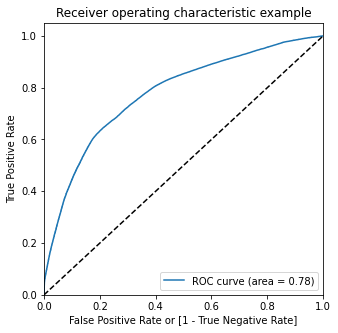

In [112]:
draw_roc(y_train_pred_final['Is_Lead'],y_train_pred_final['Islead_Prob'])

In [113]:
df_logr = pd.DataFrame()
df_logr['ID'] = y_pred_final['ID']
df_logr['Is_Lead'] = y_pred_final['Is_Lead']

In [114]:
df_logr.to_csv(r'C:\Users\avina\OneDrive\Desktop\Data\Job-a-thon dataset\logr_sub.csv')